In [1]:
import numpy as np
import random
import networkx as nx
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clt

/home/levina/lfz197/.conda/envs/apoorvaenv/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
L = 128
data = np.loadtxt("pd-data/pd-{0}-zoomed-avg".format(L))


max_m = 0
temp = 0
for i in range(len(data)):
    if temp < data[i][2]:
        temp = data[i][2]
        max_m = data[i][0]
    
print(max_m)
max_m = round(max_m, 3)

0.9030303030303031


In [3]:
def plot_phase_diagram(L=L):

    #Sizes simulated
    sizes = [L]

    #Two subplots in columns
    fig, axes = plt.subplots(figsize=(8,5), ncols=2, nrows=1)

    #To color lines
    cmap = plt.cm.get_cmap("Purples")
    colors = [cmap(x) for x in [0.5, 0.7, 0.9]]

    #Plot mean and variance in their subplots
    for j,L in enumerate(sizes):
        data = np.loadtxt("pd-data/pd-{0}-zoomed-avg".format(L))
        axes[0].plot(data[:,0], data[:,1], color=colors[j], label=r"L={0}".format(L))
        axes[0].axvline(x=max_m, color='r', ls='dotted')
        axes[1].plot(data[:,0], np.sqrt(data[:,2]) * L, color=colors[j])
        axes[1].axvline(x=max_m, color='r',ls = 'dotted')


    #Set labels
    axes[0].set_xlabel("Branching ratio", fontsize=14)
    axes[0].set_ylabel(r"⟨ρ⟩", fontsize=14)
    axes[1].set_xlabel("Branching ratio", fontsize=14)
    axes[1].set_ylabel(r"χ", fontsize=14)
    axes[0].legend(loc="upper left")
    axes[1].text(0.6,0.9," m = {}".format(max_m),transform=plt.gca().transAxes, fontsize=14)


    #Save
    plt.tight_layout()
    plt.savefig("pd-plots/pd-"+str(sizes[0])+"zoomed-avg.png", dpi=300, bbox_inches="tight")

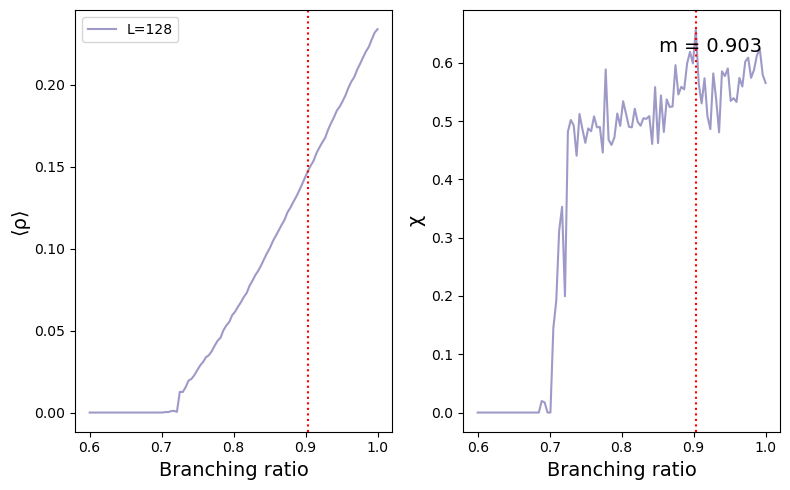

In [4]:
plot_phase_diagram(L)